In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading the dataset file
dataset = pd.read_csv('/content/drive/MyDrive/UG Project/UG project dataset.csv')
print(dataset.head())

  Alloy code     C  ...   Elongation (%)   Reduction in Area (%)
0        MBB  0.12  ...               30                      71
1        MBB  0.12  ...               27                      72
2        MBB  0.12  ...               23                      69
3        MBB  0.12  ...               21                      70
4        MBB  0.12  ...               26                      79

[5 rows x 20 columns]


In [57]:
columns = list(dataset.columns)
print(*columns, sep=' | ')

Alloy code |  C |  Si |  Mn |  P |  S |  Ni |  Cr |  Mo |  Cu | V |  Al |  N | Ceq | Nb + Ta |  Temperature (°C) |  0.2% Proof Stress (MPa) |  Tensile Strength (MPa) |  Elongation (%) |  Reduction in Area (%)


In [4]:
# x includes all the input features including the composition of the alloy and temperature
# y inclues the mechanical properties of the alloy which are to be predicted by the model
x = dataset.iloc[:, 1:16].values
y = dataset.iloc[:, 16:].values

In [5]:
# Making the train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, shuffle = True, random_state = 2)

In [6]:
# Scaling down the inputs and outputs
# Scaling method used here is : scaled_value = (x - mean)/(std_dev) 

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [51]:
# Building the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(units = 15, kernel_initializer = 'normal', activation = 'tanh', input_dim = 15))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 45, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 40, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 30, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 20, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'tanh'))
model.add(Dense(units = 4, kernel_initializer = 'normal', activation = 'tanh'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [52]:
# Training the model and predicting the results
history = model.fit(x_train, y_train, batch_size = 256, shuffle=True, epochs = 10000)
nn_pred = model.predict(x_test)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
3/3 [==============================] - 0s 17ms/step - loss: 0.2982 - mean_squared_error: 0.2982
Epoch 7502/10000
3/3 [==============================] - 0s 8ms/step - loss: 0.4089 - mean_squared_error: 0.4089
Epoch 7503/10000
3/3 [==============================] - 0s 9ms/step - loss: 0.2828 - mean_squared_error: 0.2828
Epoch 7504/10000
3/3 [==============================] - 0s 12ms/step - loss: 0.2890 - mean_squared_error: 0.2890
Epoch 7505/10000
3/3 [==============================] - 0s 11ms/step - loss: 0.4144 - mean_squared_error: 0.4144
Epoch 7506/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.2195 - mean_squared_error: 0.2195
Epoch 7507/10000
3/3 [==============================] - 0s 7ms/step - loss: 0.2225 - mean_squared_error: 0.2225
Epoch 7508/10000
3/3 [==============================] - 0s 5ms/step - loss: 0.4066 - mean_squared_error: 0.4066
Epoch 7509/10000
3/3 [============================

In [63]:
# Determining the model accuracy
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = r2_score(y_test_init, final)
mse = mean_squared_error(y_test, nn_pred)
mae = mean_absolute_error(y_test, nn_pred)
print('r2_score = ' + str(round(r2, 2)) + '              Higher is better')
print('mean_squared_error = ' + str(round(mse, 2)) + '    Lower is better')
print('mean_absolute_error = ' + str(round(mae, 2)) + '   Lower is better')

r2_score = 0.84              Higher is better
mean_squared_error = 0.13    Lower is better
mean_absolute_error = 0.23   Lower is better


In [54]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error'])


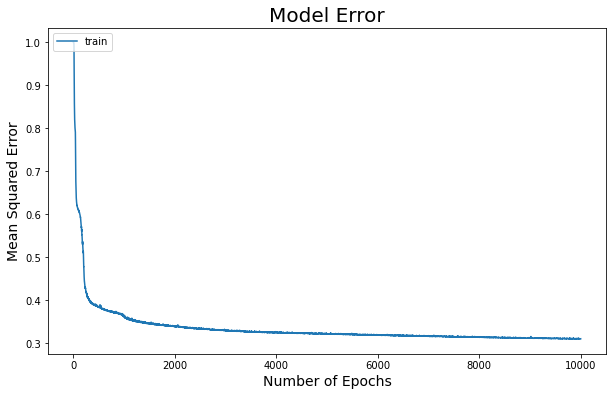

In [164]:
# Visualizing the model's learning history
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['mean_squared_error'])
plt.title('Model Error', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xlabel('Number of Epochs', fontsize=14)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
# Scaling up the outputs back to original
y_predicted = sc_y.inverse_transform(nn_pred)
y_test_init = sc_y.inverse_transform(y_test)

In [88]:
# Visualizing the accuracy of predicted values
predicted_proof_strength = np.transpose(y_predicted)[0]
predicted_tensile_strength = np.transpose(y_predicted)[1]
predicted_pct_elongation = np.transpose(y_predicted)[2]
predicted_pct_reduction_area = np.transpose(y_predicted)[3]

actual_proof_strength = np.transpose(y_test_init)[0]
actual_tensile_strength = np.transpose(y_test_init)[1]
actual_pct_elongation = np.transpose(y_test_init)[2]
actual_pct_reduction_area = np.transpose(y_test_init)[3]

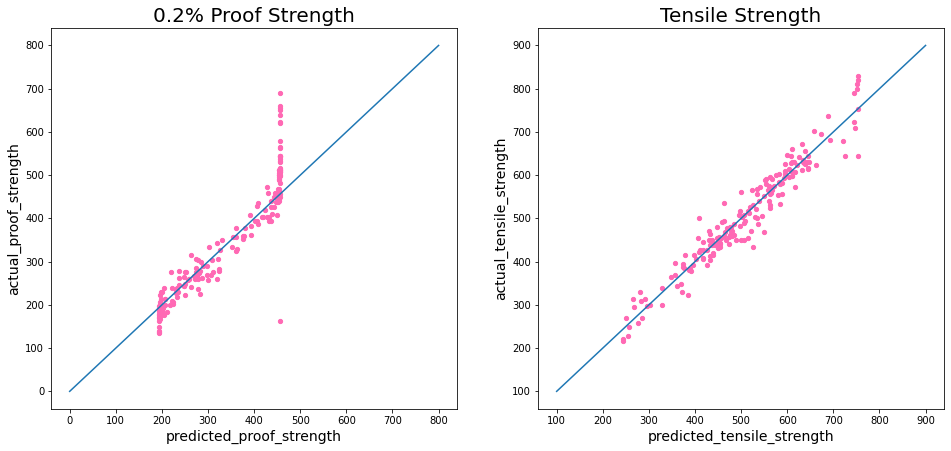

In [156]:
# Plotting graphs for 0.2% Proof Strength and Tensile Strength
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(16,7))

ax0.scatter(predicted_proof_strength, actual_proof_strength, color = 'hotpink', s=18)
x3 = np.linspace(0, 800, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('0.2% Proof Strength', fontsize = 20)
ax0.set_xlabel('predicted_proof_strength', fontsize = 14)
ax0.set_ylabel('actual_proof_strength', fontsize = 14)

ax1.scatter(predicted_tensile_strength, actual_tensile_strength, color = 'hotpink', s=18)
x4 = np.linspace(100, 900, 1000)
y4 = x4
ax1.plot(x4, y4)
ax1.set_title('Tensile Strength', fontsize = 20)
ax1.set_xlabel('predicted_tensile_strength', fontsize = 14)
ax1.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()

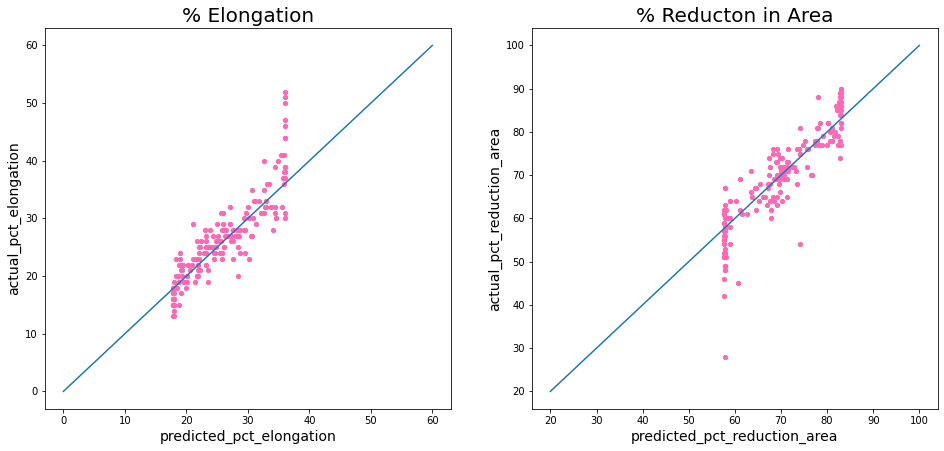

In [157]:
# Plotting graphs for % Elongation and % Reduction in Area
fig, (ax2,ax3) = plt.subplots(1,2,figsize=(16,7))

ax2.scatter(predicted_pct_elongation, actual_pct_elongation, color = 'hotpink', s=18)
x3 = np.linspace(0, 60, 1000)
y3 = x3
ax2.plot(x3, y3)
ax2.set_title('% Elongation', fontsize = 20)
ax2.set_xlabel('predicted_pct_elongation', fontsize = 14)
ax2.set_ylabel('actual_pct_elongation', fontsize = 14)

ax3.scatter(predicted_pct_reduction_area, actual_pct_reduction_area, color = 'hotpink', s=18)
x4 = np.linspace(20, 100, 1000)
y4 = x4
ax3.plot(x4, y4)
ax3.set_title('% Reducton in Area', fontsize = 20)
ax3.set_xlabel('predicted_pct_reduction_area', fontsize = 14)
ax3.set_ylabel('actual_pct_reduction_area', fontsize = 14)

plt.show()

In [117]:
# r2_score for each mechanical property
r2_proof_strength = r2_score(actual_proof_strength, predicted_proof_strength)
r2_tensile_strength = r2_score(actual_tensile_strength, predicted_tensile_strength)
r2_pct_elongation = r2_score(actual_pct_elongation, predicted_pct_elongation)
r2_pct_reduction_area = r2_score(actual_pct_reduction_area, predicted_pct_reduction_area)
print('r2 score for 0.2% Proof Strength = ' + str(round(r2_proof_strength, 2)))
print('r2 score for Tensile strength    = ' + str(round(r2_tensile_strength, 2)))
print('r2 score for % Elongation        = ' + str(round(r2_pct_elongation, 2)))
print('r2 score for % Reduction in Area = ' + str(round(r2_pct_reduction_area, 2)))

r2 score for 0.2% Proof Strength = 0.83
r2 score for Tensile strength    = 0.94
r2 score for % Elongation        = 0.78
r2 score for % Reduction in Area = 0.79
